In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer


In [119]:
mail_data=pd.read_csv("C:\\Users\\Deept\\Downloads\\mail_data.csv")

In [120]:
print(mail_data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [121]:
# checking for null values

In [122]:
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [123]:
# knowing how many rows and columns in a given dataframe

In [124]:
mail_data.shape

(5572, 2)

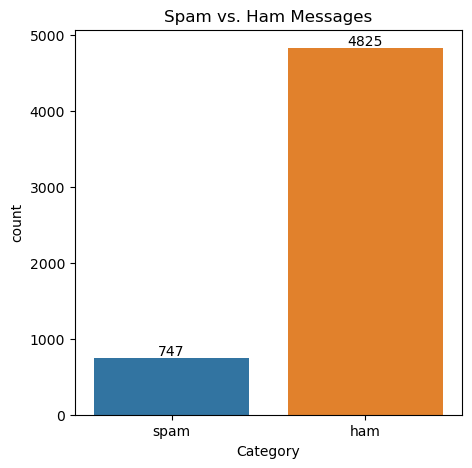

In [142]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=mail_data,x="Category")
plt.xticks(ticks=[0, 1], labels=["spam", "ham"])
ax.bar_label(ax.containers[0])
plt.title("Spam vs. Ham Messages")
plt.show()

In [125]:
# label encoding , spam as 0 and ham as 1


In [126]:
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category']=1


In [127]:
# separating the data as tests and label

In [128]:
x=mail_data['Message']
y=mail_data['Category']


In [129]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [130]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [65]:
# splitting data into train and testing data  

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=3)

In [91]:
# feature extraction

In [92]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)


In [93]:
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

# convert y_train and y_test values as integers
y_train=y_train.astype(int)
y_test=y_test.astype(int)


In [94]:
# training the model

In [95]:
model=LogisticRegression()
model.fit(x_train_features,y_train)

LogisticRegression()

In [96]:
#prediction on trained data 

In [97]:
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)
print("accuracy on training data:",accuracy_on_training_data)

accuracy on training data: 0.9710938976006046


In [98]:
# prediction on test data

In [99]:
prediction_on_testing_data=model.predict(x_test_features)
accuracy_on_testing_data=accuracy_score(y_test,prediction_on_testing_data)
print("accuracy on testing data:",accuracy_on_testing_data)

accuracy on testing data: 0.9605734767025089


In [100]:
# building a predictive system

In [109]:
input_mail=["Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You?"]
input_data_features=feature_extraction.transform(input_mail)

In [110]:
# making prediction

In [111]:
prediction=model.predict(input_data_features)
print(prediction)

[1]


In [112]:
if prediction[0]==1:
    
    print("it's a ham mail!")
else:
    print("it's a spam mail!")

it's a ham mail!
